# Data Exploration
The purpose of this notebook is to explore more in depth the _Spotify Tracks_ dataset and propose preprocessing techniques for each of the features present in the dataset.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

songs = pd.read_csv('data/spotify_data.csv', index_col=0)
print(f"There are {len(songs)} songs in the dataset")
print(f"The dataset has a total of {len(songs.columns)} features")
songs.head()

There are 114000 songs in the dataset
The dataset has a total of 20 features


,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Cleaning the dataset

* Eliminate song duplicates
* Drop columns with missing data

In [14]:
songs = songs.drop_duplicates(['track_name','artists'])
# Drop rows with missing values
songs.dropna(inplace=True)
print(f"There are {len(songs)} unique songs in the dataset")

There are 81343 unique songs in the dataset


## Exploring categorical features

In [12]:
categorical_features = songs[['explicit', 'key', 'mode', 'time_signature']]
categorical_features.head()

,explicit,key,mode,time_signature
0,False,1,0,4
1,False,1,1,4
2,False,0,1,4
3,False,0,1,3
4,False,2,1,4


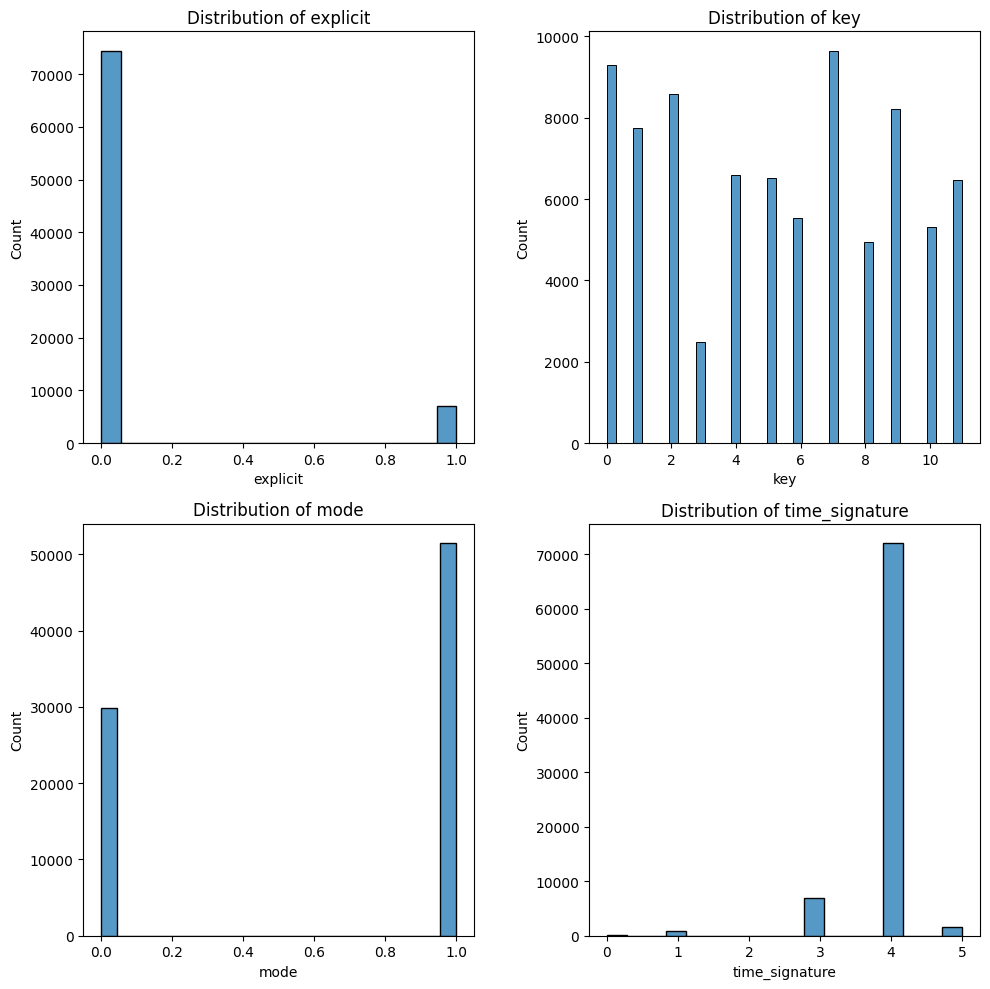

In [15]:
fig = plt.figure(figsize=(10, 10))
for i, feature in enumerate(categorical_features.columns, 1): 
    ax = plt.subplot(2, 2, i)
    sns.histplot(data=categorical_features, x=categorical_features[feature])
    ax.set_title(f'Distribution of {feature}')
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

## Exploring numerical features

In [22]:
numerical_features = songs.select_dtypes(include='number')
shared_features = set(categorical_features.columns).intersection(numerical_features.columns)
numerical_features.drop(shared_features, axis=1, inplace=True)
print(f"There are {len(numerical_features.columns)} numerical features")
numerical_features.describe()

There are 11 numerical features


,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,81343.000000,8.134300e+04,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,2.314145e+05,0.559276,0.635025,-8.593930,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834
std,19.438517,1.164924e+05,0.177747,0.258641,5.304797,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012
min,0.000000,8.586000e+03,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.738710e+05,0.446000,0.455000,-10.451500,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000
50%,35.000000,2.152050e+05,0.573000,0.678000,-7.262000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000
75%,49.000000,2.673460e+05,0.690000,0.857000,-5.140000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


Converting duration to minutes so that it is easier to interpret

In [23]:
numerical_features['duration_ms'] = numerical_features['duration_ms'] / (1000 * 60)
numerical_features.rename(columns={'duration_ms': 'duration_min'}, inplace=True)
numerical_features.describe()

,popularity,duration_min,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000,81343.000000
mean,34.636392,3.856908,0.559276,0.635025,-8.593930,0.088993,0.329666,0.184733,0.219723,0.463277,122.144834
std,19.438517,1.941539,0.177747,0.258641,5.304797,0.116629,0.339961,0.331592,0.198272,0.263383,30.129012
min,0.000000,0.143100,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,2.897850,0.446000,0.455000,-10.451500,0.036100,0.015900,0.000000,0.098500,0.241000,99.408000
50%,35.000000,3.586750,0.573000,0.678000,-7.262000,0.049100,0.190000,0.000089,0.133000,0.449000,122.030000
75%,49.000000,4.455767,0.690000,0.857000,-5.140000,0.087000,0.629000,0.153000,0.283000,0.676000,140.128500
max,100.000000,87.288250,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


### Features we could consider normalising:
* duration_min
* loudness
* tempo
* popularity? (not sure about this one but since almost all numerical features are in a range between 0-1 it could make sense to normalize it)

### Finding outliers

* The tree algorithms and SVMs are robust to outliers but Naive Bayes and Logistic Regression might perform better if we deal with outliers

Some features that might have outliers:
* The average song duration is 3.85 min but there is a song in the dataset that lasts around 87 min
* Speechiness has a mean of 0.088 but the max speechiness is 0.965

We can find more outliers by visualizing the values of the features with a box plot

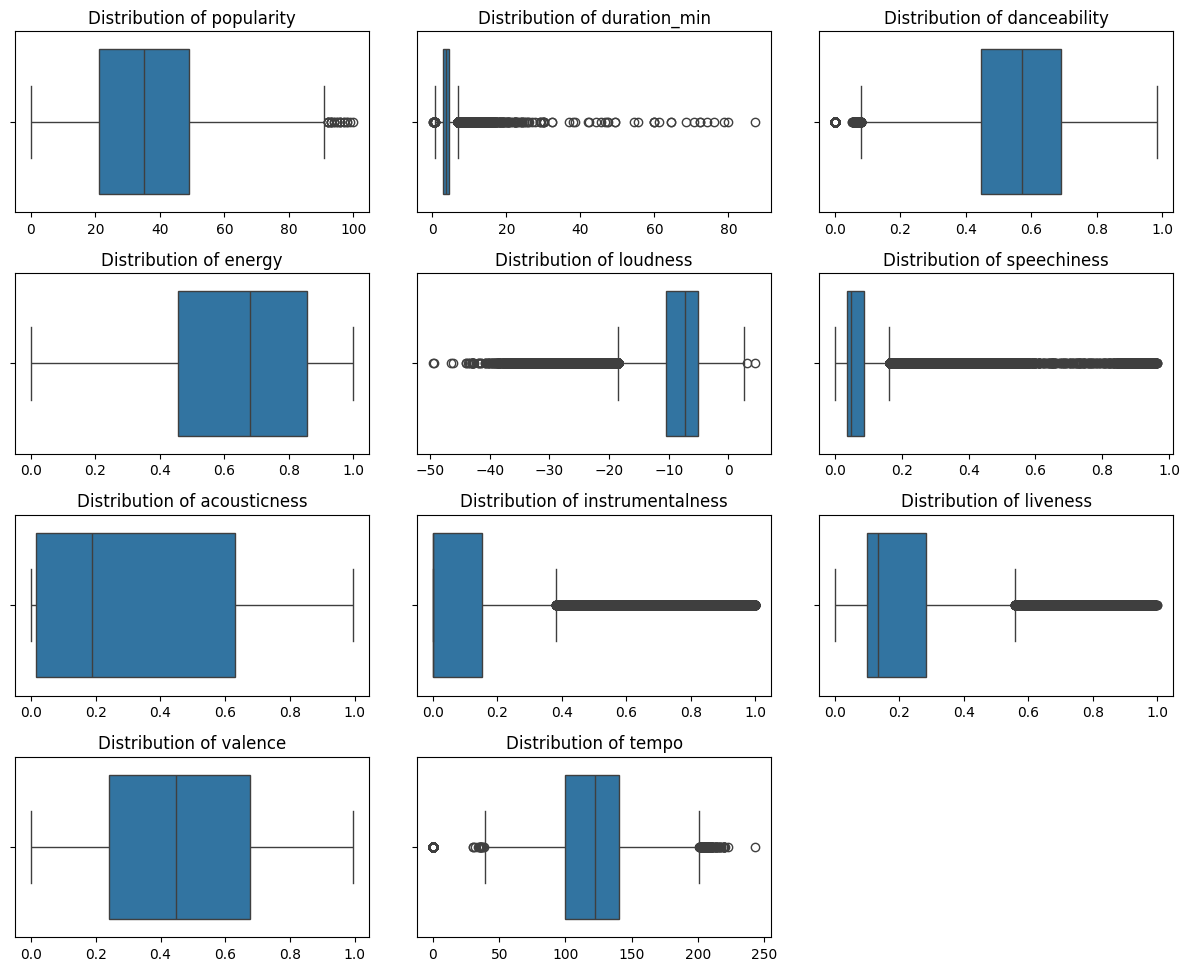

In [24]:
fig = plt.figure(figsize=(12, 12))
for i, feature in enumerate(numerical_features.columns, 1): 
    ax = plt.subplot(4, 3, i)
    sns.boxplot(data=numerical_features, x=numerical_features[feature])
    ax.set_xlabel(None)
    ax.set_title(f'Distribution of {feature}')
    plt.tight_layout(w_pad=3) # adds padding between the subplots
plt.show()

From looking at the box plots, almost all features have outliers.

The only ones without outliers are: 
* Valence
* Acousticness
* Energy

### What to do with the outliers?

* We can discuss this together or ask the tutors :)

## Exploring string features
* We could apply some preprocessing techniques we will learn on the _Text Mining_ lecture (this week 18.10)

In [48]:
string_features = songs[['artists', 'album_name', 'track_name']]
# This number is inaccurate because some tracks have lists of artists separated by ;
print(f"There are {len(songs['artists'].unique())} artists in the dataset")
print(f"There are {len(songs['album_name'].unique())} albums in the dataset")
string_features.head()

There are 31437 artists in the dataset
There are 45094 albums in the dataset


,artists,album_name,track_name
0,Gen Hoshino,Comedy,Comedy
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love
4,Chord Overstreet,Hold On,Hold On


## Exploring class distribution

* Check balance of the song genres

In [49]:
print(f"There are {len(songs['track_genre'].unique())} unique genres")
grouped_by_genre = songs.groupby(['track_genre']).size()
grouped_by_genre.describe()

There are 113 unique genres


count    113.000000
mean     719.849558
std      242.339572
min       63.000000
25%      608.000000
50%      808.000000
75%      915.000000
max      996.000000
dtype: float64

### Class balance

* The classes are imbalanced (to be expected because of the large number of classes)
* We could consider groupping music genres together by the parent genre
    * This could simplify our classification task
    * For example: reggaeton (63 songs) and latino (332 songs) could be groupped together to form a bigger class
* Some genres I found to be a bit weird:
    * singer-songwriter
    * comedy
    * language genres (german, swedish, french, spanish, iranian, turkish)
    * study

In [42]:
grouped_by_genre.sort_values()

track_genre
reggaeton             63
indie                107
house                134
reggae               166
rock                 167
punk                 208
metal                213
jazz                 217
alternative          238
dubstep              253
soul                 275
pop                  299
latino               332
electro              384
techno               401
r-n-b                431
singer-songwriter    432
latin                436
j-rock               449
indie-pop            465
dance                486
edm                  510
sad                  536
rockabilly           543
psych-rock           550
country              570
j-pop                594
groove               600
punk-rock            608
samba                610
funk                 621
hard-rock            626
german               634
swedish              647
hip-hop              659
party                662
gospel               665
metalcore            675
trance               676
progressive-h